<a href="https://colab.research.google.com/github/Joshuaiwuoha/Analytics-projects-/blob/main/Copy_of_Investigate_no_show_appointment_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Investigate a Dataset - No_show_appointment_dataset

Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href = '#quality'>Data Quality Issues</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment. ‘Neighborhood’ indicates the location of the hospital. ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis
* Does the time of day have an effect on appointment attendance?
* Are there any geographic factors that influence appointment attendance?
* What is the impact of patient characteristics (e.g. age, gender, etc.) on appointment attendance?
* Does the presence of a health condition affect appointment attendance rates?
* Does the type of communication used to make an appointment (e.g. sms received) have an effect on no-show rates?
* How does the time difference between the appointment day and scheduled day affect the decision to send an sms reminder?



In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, The dataset is loaded, checked for cleanliness, and then trimed and cleaned for analysis. The Data cleaning steps are documented in mark-down cells precisely and cleaning decisions justified.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/noshowappointments-kagglev2-may-2016.csv')
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


<a id = 'assessment'></a>
### Programmatic Assessment

In [ ]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')
      
      

There are 110527 rows and 14 columns


In [ ]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no missing values in the data set and most are of the integer datatype.

In [ ]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Most of the columns have values in the binary format (0 or 1 ) with the exception of the Handcap column which has a maximum value of 4, further exploration will uncover whether there are more unique values in the column.
Also observed, is a bit of a discrepancy in the age column as there are negative ages included but will be addressed in the data cleaning and prepossessing stage of the analysis.

<a id = 'quality'></a>
### Data Quality Issues.


* Spelling error for 'hipertension','handcap'.
* Change all column names to lowercase.
* Replace all occurrences of '-' with '\_' to maintain consistency.
* Change 'scheduledday' to a datetime object.
* Drop the two id columns.
* Remove all negative ages in the age column ,visualize to see and eliminate outliers.
* Check the metadata for description of the columns, specifically the 'handcap' column and ensure it conforms to the binary standard like the other columns. 
* Rename the **no_show** column __show__. Reverse the entries, with __no__ == 1(Those who showed up to their appointment) and __yes__ == 0(Those who failed to show up).

##### Drop the two id columns as they are irrelevant to our analysis.

In [ ]:
df = df.iloc[:,2:]
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


##### Change all column names to lowercase.

In [ ]:
df.rename(columns = {x: x.lower() for x in df.columns},inplace = True)

##### Replace all occurrences of '-' with '_' to maintain consistency

In [ ]:
df.rename(columns = {x : x.replace('-','_') for x in df.columns},inplace = True)

##### Correct Spelling error for 'hipertension','handcap'. Rename the no_show column show. 

In [ ]:
df.rename(columns = {'hipertension':'hypertension','handcap':'handicap','no_show':'show'},inplace = True)

##### Reverse the entries in the show column, with no == 1 and yes == 0.

In [ ]:
df['show'] = df.show.replace('No',1)
df['show'] = df.show.replace('Yes',0)



##### Test

In [ ]:
df.show.value_counts()

1    88208
0    22319
Name: show, dtype: int64

##### Remove all negative ages in the age column.

In [ ]:
df = df.query('age > 0')

##### Test

In [ ]:
df.age.describe()

count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: age, dtype: float64

Transform the handicap column to a binary format

In [ ]:
df.handicap.value_counts(normalize = True)*100,df.handicap.value_counts()

(0    97.906288
 1     1.907708
 2     0.171049
 3     0.012151
 4     0.002804
 Name: handicap, dtype: float64,
 0    104747
 1      2041
 2       183
 3        13
 4         3
 Name: handicap, dtype: int64)

In terms of whether the values other than zero or one represent either zero or one, it would be next to impossible to precisely ascertain the error made. Considering the number of affected rows amounts to less than 1% of the total data, I will remove those rows.

In [ ]:
df = df.query('handicap <=1')

Test

In [ ]:
df.handicap.nunique()

2

In [ ]:
df.to_csv('patients_appointments.csv',index = False)

In [ ]:
df = pd.read_csv('patients_appointments.csv')
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1


In [ ]:
df['show'] = df.show.replace(1,'show')
df['show'] = df.show.replace(0,'no_show')

Convert appointmentday and scheduledday to datetime objects

In [ ]:
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [ ]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'])

<a id='eda'></a>
## Exploratory Data Analysis

> Here, I examine the trimmed and cleaned dataset, perform statistical calculations, and produce visualizations in an effort to respond to the research questions I'll put forth.


## Research que 1; Does the time of day have an effect on appointment attendance?

In [ ]:
#maximum and minimum appointment hours to be able to create the groupings
df.scheduledday.dt.hour.max(), df.scheduledday.dt.hour.min()

(21, 6)

In [ ]:
#a new column showing the the various hours in the dataset grouped.
df['time_of_day'] = pd.cut(df['scheduledday'].dt.hour, [0, 8, 16, 24], labels=['morning', 'afternoon', 'evening'])


In [ ]:
time = df.groupby(df['time_of_day'])['show'].value_counts().unstack()
time

show,no_show,show
time_of_day,,
morning,5915,29182
afternoon,14587,52334
evening,1137,3633


In [ ]:
time = (df.groupby(df['time_of_day'])['show'].value_counts(normalize = True)*100).unstack()
time

show,no_show,show
time_of_day,,
morning,16.853292,83.146708
afternoon,21.797343,78.202657
evening,23.836478,76.163522


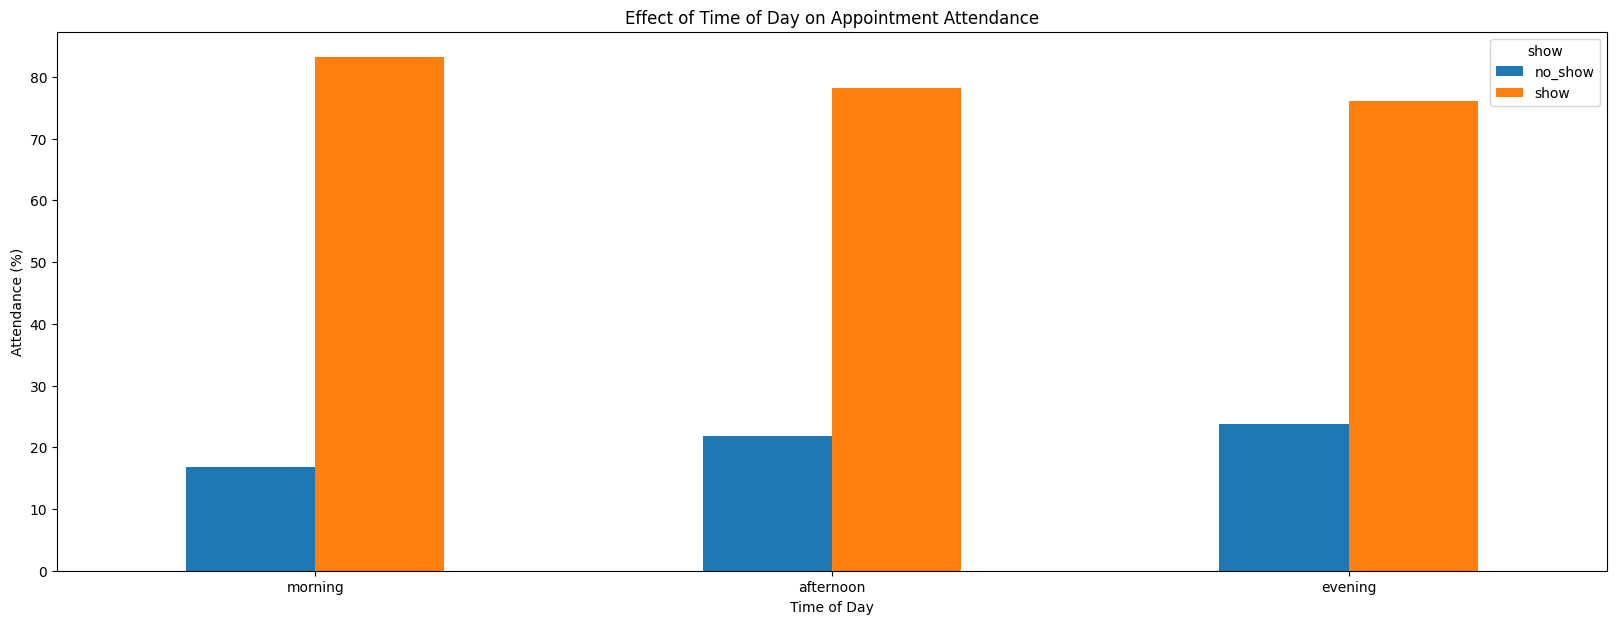

In [ ]:
time.plot(kind = 'bar',figsize = (20,7))
plt.xticks(rotation = 0)
plt.xlabel('Time of Day')  
plt.ylabel('Attendance (%)')  
plt.title('Effect of Time of Day on Appointment Attendance');

Evidently, attendance rates increase for appointments booked in the morning and decrease as the day wears on. considering that nighttime appointments had the lowest turnout percentage (76%) of all times.
It's significant to observe that appointments are more frequently arranged in the afternoons than in the evenings.

### Are there any geographic factors that influence appointment attendance?
> According to my intuition, sites with a high volume of planned appointments may see a greater rate of missed appointments since there may be a lengthier wait time, which might deter patients from turning up.

In [ ]:
print(f'There are {len(df.neighbourhood.value_counts().tolist())} distinct appointment locations in the dataset')



There are 81 distinct appointment locations in the dataset


In [ ]:
#count of appointments per location
neigh_count = df.neighbourhood.value_counts().to_frame()
neigh_count.columns = ['total_count']
neigh_turnup_pct = (df.groupby('neighbourhood')['show'].value_counts(normalize = True)*100).unstack().round()



First i grouped by the __neighbourhood__ column and sliced out the __show__ column. Then i did a _value_counts_ on the __show__ column but returned the result as a percentage. The last part was to just unstack and then round the figures returned.

In [ ]:
#simply merged neigh_count with neigh_turnup_pct
neigh = neigh_turnup_pct.merge(neigh_count, left_on= neigh_turnup_pct.index,right_on = neigh_count.index)
neigh.rename(columns = {'key_0':'neighbourhood','no_show':'no_show_pct','show':'show_pct'},inplace = True)


In [ ]:
top_fifteen = neigh.sort_values(['total_count','show_pct'],ascending = False).head(15)
top_fifteen.set_index('neighbourhood',inplace = True)


Top fifteen location with the most appointments.

In [ ]:
bottom_fifteen = neigh.query('total_count >100').sort_values(['total_count'],ascending = True).head(15)
bottom_fifteen.sort_values('total_count',ascending = False,inplace = True)


Top fifteen location with the least amount of appointments.

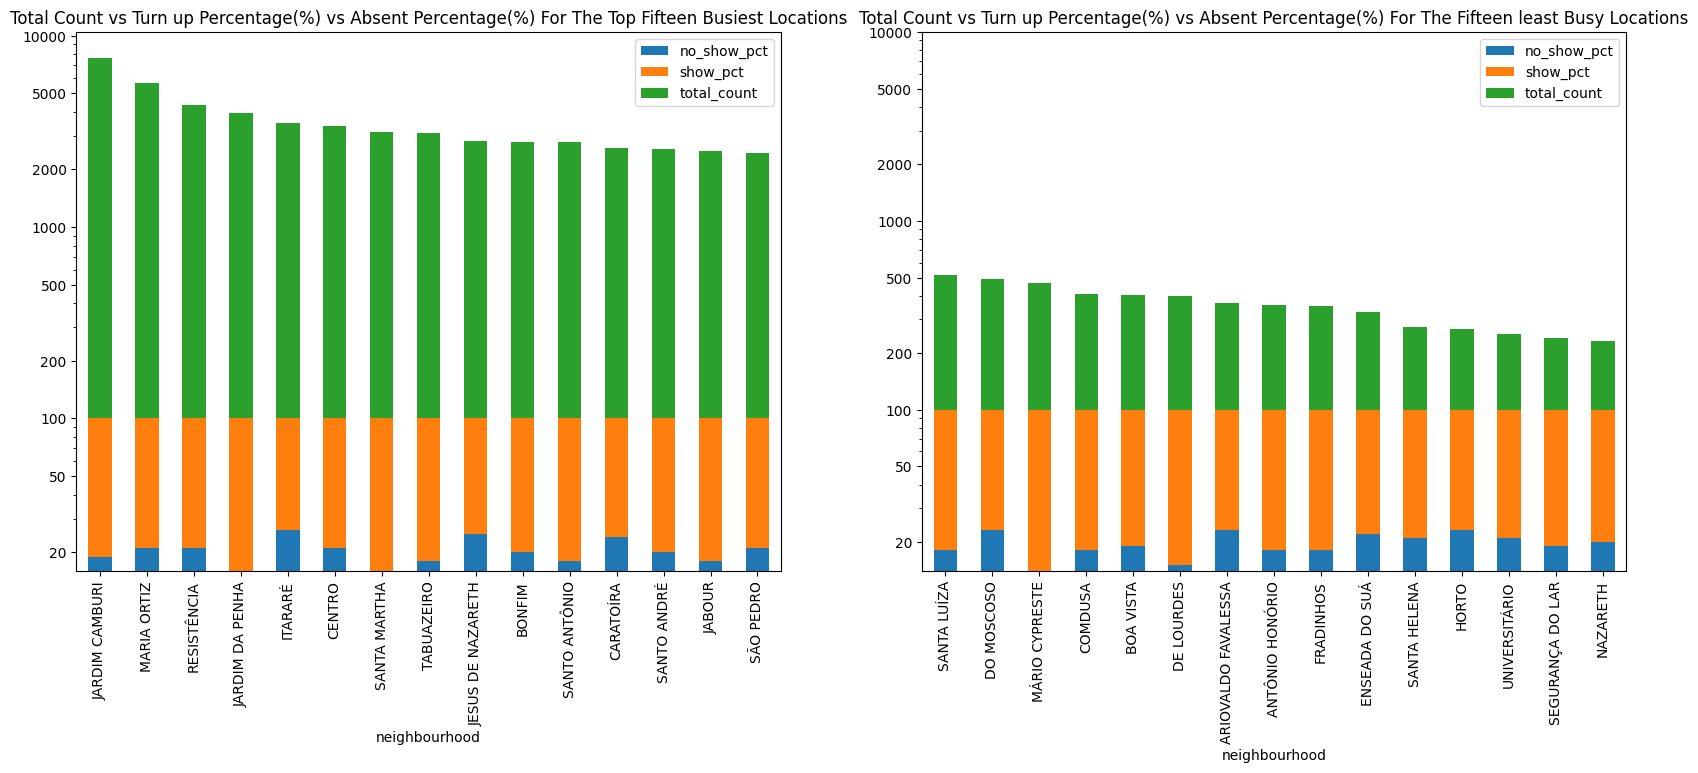

In [ ]:
fig,ax = plt.subplots(1,2,sharey = False)
plt.subplots_adjust(hspace = 250000)
ticks = [20,50,100,200,500,1000,2000,5000,10000]
labels = ['{}'.format(i) for i in ticks]
top_fifteen.plot(ax = ax[0],figsize = (20,7),kind = 'bar',stacked = True)
ax[0].set_yscale('log')
ax[0].set_yticks(ticks)
ax[0].set_yticklabels(labels)
ax[0].set_title('Total Count vs Turn up Percentage(%) vs Absent Percentage(%) For The Top Fifteen Busiest Locations');


ticks = [20,50,100,200,500,1000,2000,5000,10000]
labels = ['{}'.format(i) for i in ticks]
bottom_fifteen.set_index('neighbourhood').plot(ax = ax[1],figsize = (20,7),kind = 'bar',stacked = True)
ax[1].set_yscale('log');
ax[1].set_yticks(ticks)
ax[1].set_yticklabels(labels)
ax[1].set_title('Total Count vs Turn up Percentage(%) vs Absent Percentage(%) For The Fifteen least Busy Locations');


My original hunch about the impact of a high number of appointments on the turn-up rate was incorrect, as demonstrated by a quick glance at the plots above. The turn-up rate is __largely consistent__ _(within the 70%- approximately 90%range)_ regardless of the number of appointments planned at the location, as is seen from the plots generated from the dataset.

## Research que 2;  What is the impact of patient characteristics (e.g. age, gender, etc.) on appointment attendance?

In [ ]:
df['age_bracket'] = pd.cut(x=df['age'], bins=[1, 20, 40, 60,80, 100,150], labels = ['under 20', '21 - 40', '41-60','61-80','81-100','above 100'])
df[['age','age_bracket']]

,age,age_bracket
0,62,61-80
1,56,41-60
2,62,61-80
3,8,under 20
4,56,41-60
...,...,...
106783,56,41-60
106784,51,41-60
106785,21,21 - 40
106786,38,21 - 40


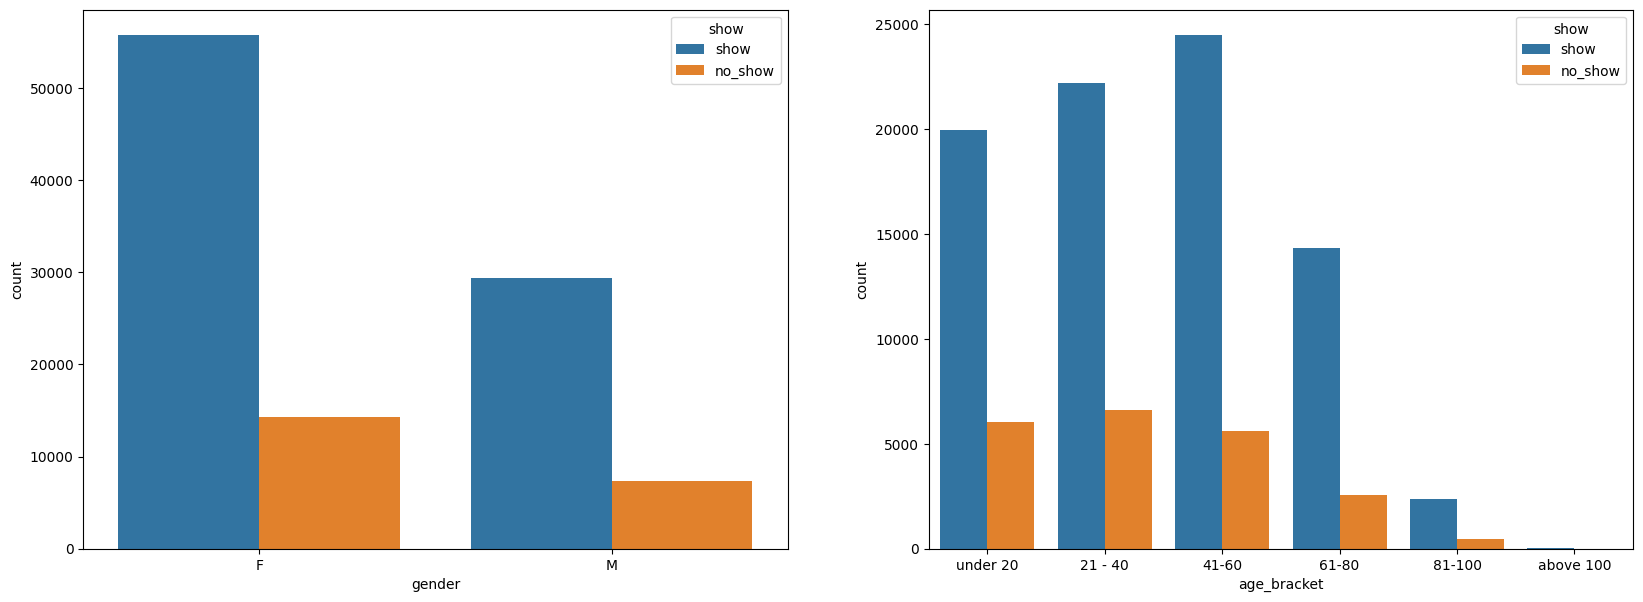

In [ ]:
 #visualize the impact of patient characteristics on appointment attendance
fig,ax = plt.subplots(1,2,figsize =(20,7))
sns.countplot(ax = ax[0],x='gender', hue='show', data=df)  #impact of gender on appointment attendance  
sns.countplot(ax = ax[1], x='age_bracket', hue='show', data=df); #impact of age on appointment attendance  

There are more females than males in the dataset, according to the metadata as well as the gender graph above, possibly because women are more aware of and deliberate about their health. It is crucial for the predictive analysis I'll conduct that I investigate this phenomenon and attempt to determine how big of an impact this bias might have on the conclusions reached from any investigation.


In [ ]:
female = df.query('gender == "F" ')
male = df.query('gender == "M" ')

Simply classify the dataset into two distinct sections (male and female).

In [ ]:
n_data = df.shape[0]
max_gender = df.gender.value_counts()[0]
max_gen = max_gender/n_data 
tick_gen = np.arange(0,max_gen+0.3,0.3)
tick_names = ['{:0.2f}'.format(i) for i in (tick_gen*n_data)] 
max_g = df.gender.value_counts()




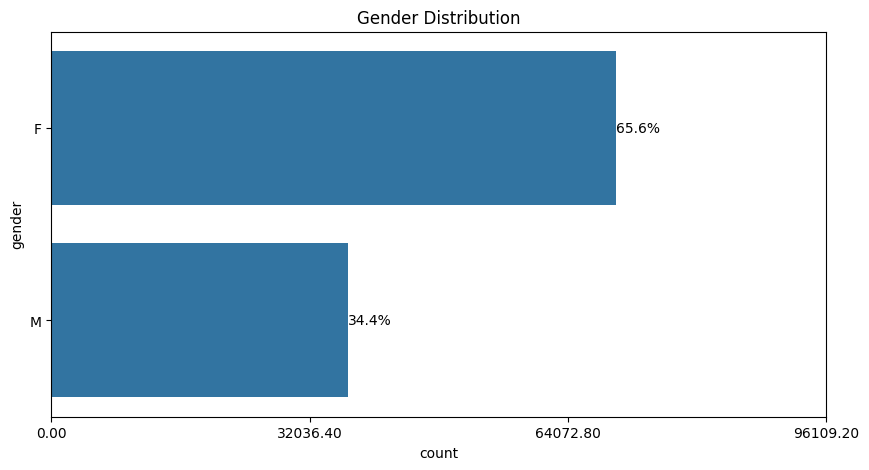

In [ ]:
plt.figure(figsize =(10,5))
sns.countplot(data = df, y = 'gender',color = sns.color_palette()[0])
plt.xticks(tick_gen*n_data,tick_names)
plt.title('Gender Distribution')
for i in range(max_g.shape[0]):
    count = max_g[i]
    pct_string = '{:0.1f}%'.format(100*count/n_data)
    plt.text(count +1, i,pct_string, va = 'center');




Apparently, there are nearly twice as much females as males. neax would be to explore how this gender size difference filters down to the various locatiopns in the dataset.

### Exploring how the gender size difference filters down to the various locations.

In [ ]:
#This returns the different neighborhoods in the dataset alongside the corresponding number of females assigned for an appointment in that neighborhood.
fem_nei = female.neighbourhood.value_counts().to_frame()
fem_nei.columns = ['female_count']


In [ ]:
#This returns the different neighborhoods in the dataset alongside the corresponding number of males assigned for an appointment in that neighborhood.
male_nei = male.neighbourhood.value_counts().to_frame()
male_nei.columns = ['male_count']   
                                                    
                                                    

In [ ]:
#The two datasets, __female_nei__ and __male_nei__, are merged into __fem_male__. 
fem_male = fem_nei.merge(male_nei, how = 'outer',left_on = fem_nei.index,right_on = male_nei.index)
fem_male.rename(columns ={'key_0':'neighbourhood'},inplace = True)
fem_male.set_index('neighbourhood',inplace = True)


In [ ]:
#Sorting the data in descending order using the female_count and male_count columns. 
fem_male.sort_values(['female_count','male_count'], ascending= False,inplace = True)



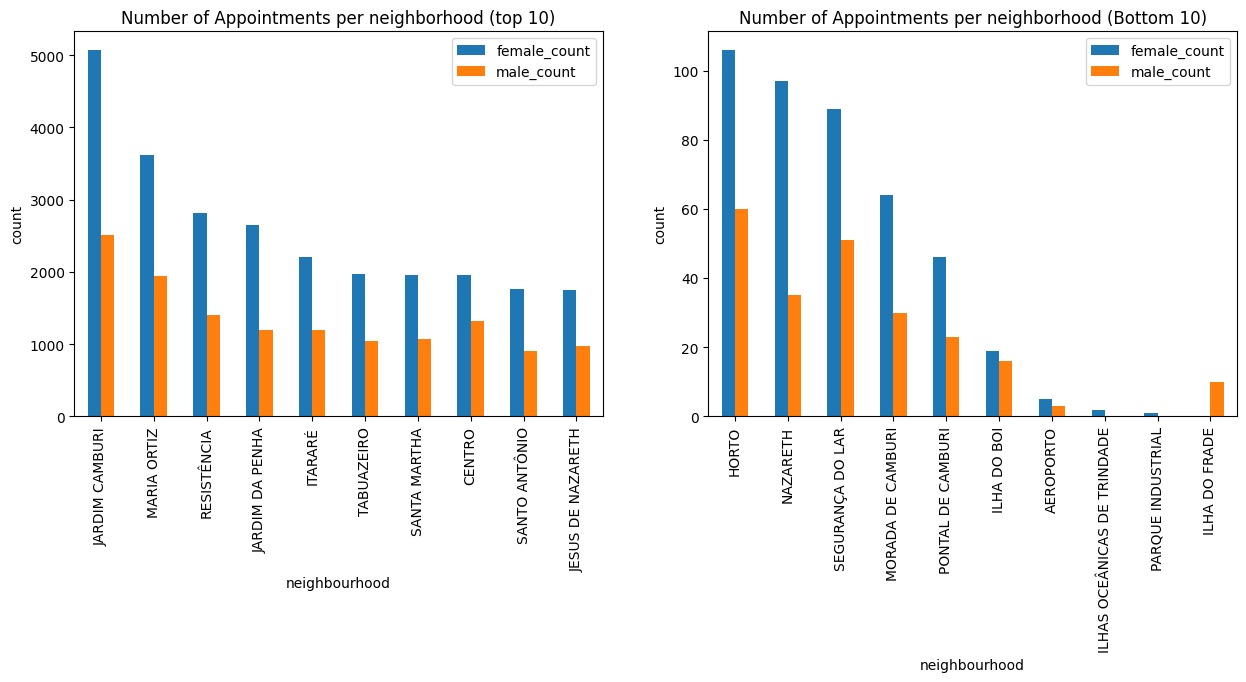

In [ ]:
fig,ax = plt.subplots(1,2)
fem_male.head(10).plot(ax = ax[0],figsize = (15,5), kind='bar',title = 'Number of Appointments per neighborhood (top 10)',ylabel = 'count')

fem_male.tail(10).plot(ax = ax[1],figsize = (15,5),kind='bar',title = 'Number of Appointments per neighborhood (Bottom 10)',ylabel = 'count');




Represented on the bar chart is the top ten as well as the bottom 10 neighborhoods with the most and least number of females and males assigned there for an appointment ,respectively. As a result of there being more females than males in the dataset overall, the same status quo filters down to the individual locations.

In [ ]:
fem_male['female_percent'] = round((fem_male.female_count/(fem_male.female_count + fem_male.male_count))*100,2)
fem_male['male_percent'] = round((fem_male.male_count/(fem_male.female_count + fem_male.male_count))*100,2)


'''First, I groupby neighborhood column and then index the __show__ and then unstack all. 
This essentially returns the various locations alonside the corresponding number of females 
that showed up and did not show up for the scheduled appointment in that location.'''
fe = female.groupby('neighbourhood')['show'].value_counts().unstack()


In [ ]:
'''First, I groupby neighborhood column and then index the __show__ and then unstack all. 
This essentially returns the various locations alonside the corresponding number of males
 that showed up and did not show up for the scheduled appointment in that location.''' 
mal= male.groupby('neighbourhood')['show'].value_counts().unstack()

In [ ]:
# fe and mal are both merged into __gef__
gef = fe.merge(mal, left_on = fe.index, right_on = mal.index)

In [ ]:
#Replace the non-descriptive columns with more descriptive ones.
gef.rename(columns = {'key_0':'neighbourhood','no_show_x':'female(no_show)','show_x':'female(show)','no_show_y':'male(no_show)','show_y':'male(show)'},inplace = True)



In [ ]:
# set the neighborhood column as the index.
gef.set_index('neighbourhood',inplace = True)

In [ ]:
gef.fillna(0,inplace = True)

In [ ]:
#To get a better understanding, a new column __female_show_pct__ shows the percentage of females that showed up at their various assigned location. 
gef['female_show_pct'] = round((gef['female(show)']/(gef['female(show)'] + gef['female(no_show)']))*100,2)

In [ ]:
#To get a better understanding, a new column __male_show_pct__ shows the percentage of males that showed up at their various assigned location.  
gef['male_show_pct'] = round((gef['male(show)']/(gef['male(show)'] + gef['male(no_show)']))*100,2)

In [ ]:
'''This is simply a check to confirm that everything thing remains correct. 
I've merged __gef__ with __neigh_count__,which was created earlier, to confirm the totals.''' 
gef = gef.merge(neigh_count, left_on = gef.index, right_on = neigh_count.index)
gef.rename(columns = {'key_0':'neighbourhood'},inplace = True)
gef.set_index('neighbourhood',inplace = True)


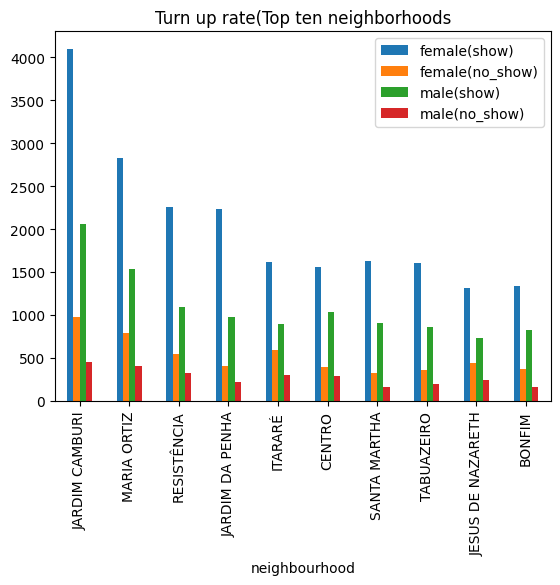

In [ ]:
gef.sort_values('total_count',ascending= False, inplace = True) #Sort __gef__ in descending order using the __total__ column. 
gef.head(10)[['female(show)','female(no_show)','male(show)','male(no_show)']].plot(kind = 'bar', title = 'Turn up rate(Top ten neighborhoods');



### Male vs Female Turn Up Rate.
> Are the men in the dataset more likely, on average, to show up for an appointment than women, in any given location?

In [ ]:
gef.head(2)

,female(no_show),female(show),male(no_show),male(show),female_show_pct,male_show_pct,total_count
neighbourhood,,,,,,,
JARDIM CAMBURI,979.0,4095.0,453.0,2059.0,80.71,81.97,7586
MARIA ORTIZ,786.0,2830.0,408.0,1539.0,78.26,79.04,5563


We have the proportion of patients who showed up for appointments at each site thanks to the earlier-created __gef__. We can basically see the distribution of attendance for each location by plotting that as a histogram.

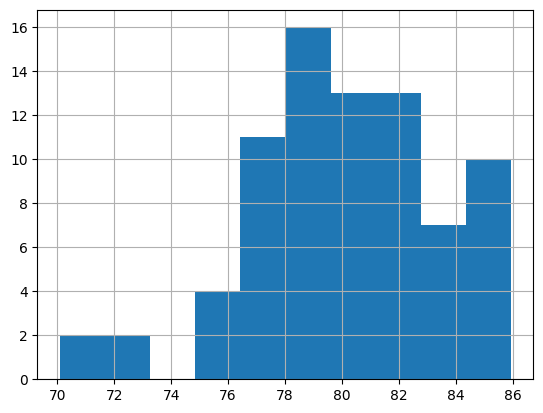

In [ ]:
gef['female_show_pct'].hist();

The __female show pct__, which displays the proportion of women who attended their appointments, is plotted on the histogram. At least 70% of female patients consistently show up for their appointments at their various sites, which is a fairly positive turn-out rate.

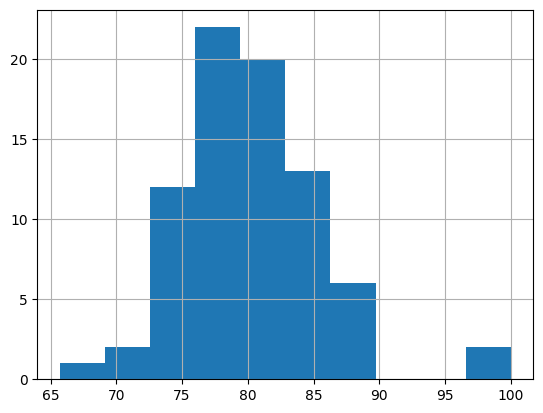

In [ ]:
gef['male_show_pct'].hist();

The __male show pct__, which displays the proportion of men who attended their appointments, is plotted on the histogram. At least 65% of the male patients consistently show up for their appointments at the various locations, which is a fairly good turn-out percentage.

### Research Question 2  Does the presence of a health condition affect appointment attendance rates?

First we try to answer the question for patients with hypertension.

In [ ]:
#slice out the data for patients with hypertension
hyp = df.query('hypertension == 1')
hyp.head(2)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,time_of_day,age_bracket
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,show,evening,61-80
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,show,afternoon,41-60


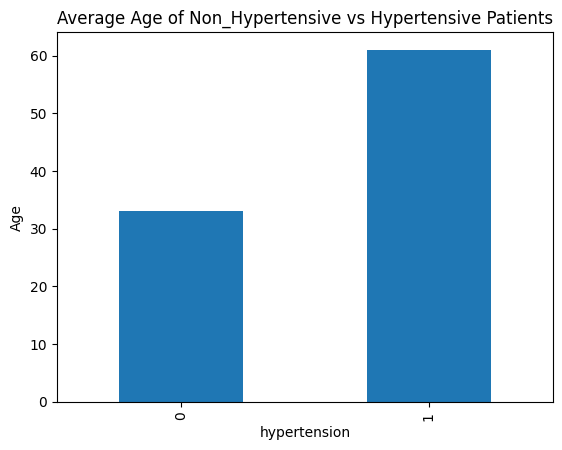

In [ ]:
df.groupby('hypertension')['age'].mean().round().plot(kind = 'bar');
plt.title('Average Age of Non_Hypertensive vs Hypertensive Patients')
plt.ylabel('Age');


According to the graph above, the average age of hypertension patients is roughly 60, whereas the average age of non-hypertensive patients is approximately 33, which is intuitively pretty plausible.

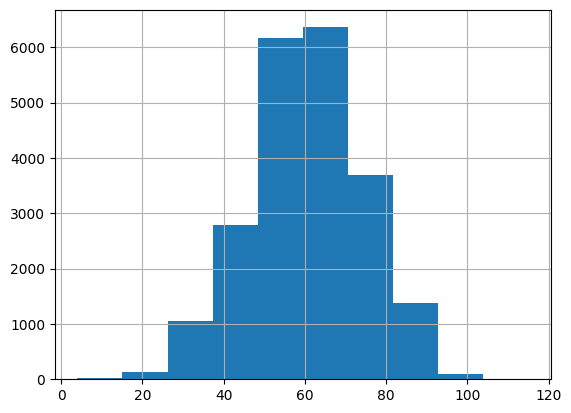

In [ ]:
hyp.age.hist();

Apparently, most of the patients with hypertension are between 40 - 80, which makes sense. There are some outliers, but the histogram doesn't show them clearly.

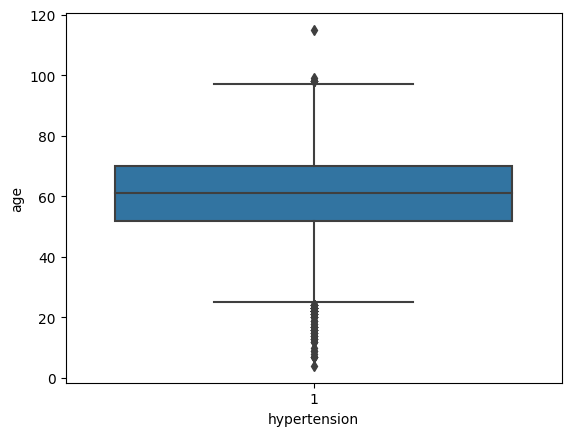

In [ ]:
sns.boxplot(data = hyp, x = 'hypertension',y = 'age');



The boxplot better visualizes the outliers. And we can see clearly that the are some patients under twenty, included in the dataset. Intuitively, this doesn't make sense, as young people hardly suffer from hypertension. [Prevalence of arterial hypertension in Brazilian adults and its associated factors and activity limitations: a cross-sectional study](https://www.google.com/url?sa=t&source=web&rct=j&url=https://www.scielo.br/j/spmj/a/htsnD7HB7fCQd3mdVNngjYg/%3Flang%3Den%23:~:text%3DRESULTS%253A,and%2520stroke%2520(PR%25201.86).&ved=2ahUKEwjNuYKygKz6AhXCQ_EDHdK-B8kQFnoECAYQBQ&usg=AOvVaw14Va6d_JViWEThvxkxxQ07)

In [ ]:
#calculating the upper and lower bounds so as to eliminate outliers
#Q3 - Q1 = interquartile range
#upper bound = q3 + (1.5 * interquartile range)
#lower bound = q1 - (1.5 * interquartile range)
upper_bound = 70 + (1.5 * 18)
lower_bound = 52 - (1.5 * 18)


In [ ]:
lower_bound,upper_bound

(25.0, 97.0)

In [ ]:
hyp = hyp.query(f'age > {lower_bound}') #Eliminate from __hyp__ patients that are less than 25 years old (the lower_bound).

In [ ]:
hyp_show_pct = (hyp.show.value_counts(normalize = True)*100).round()
hyp_show_pct



show       83.0
no_show    17.0
Name: show, dtype: float64

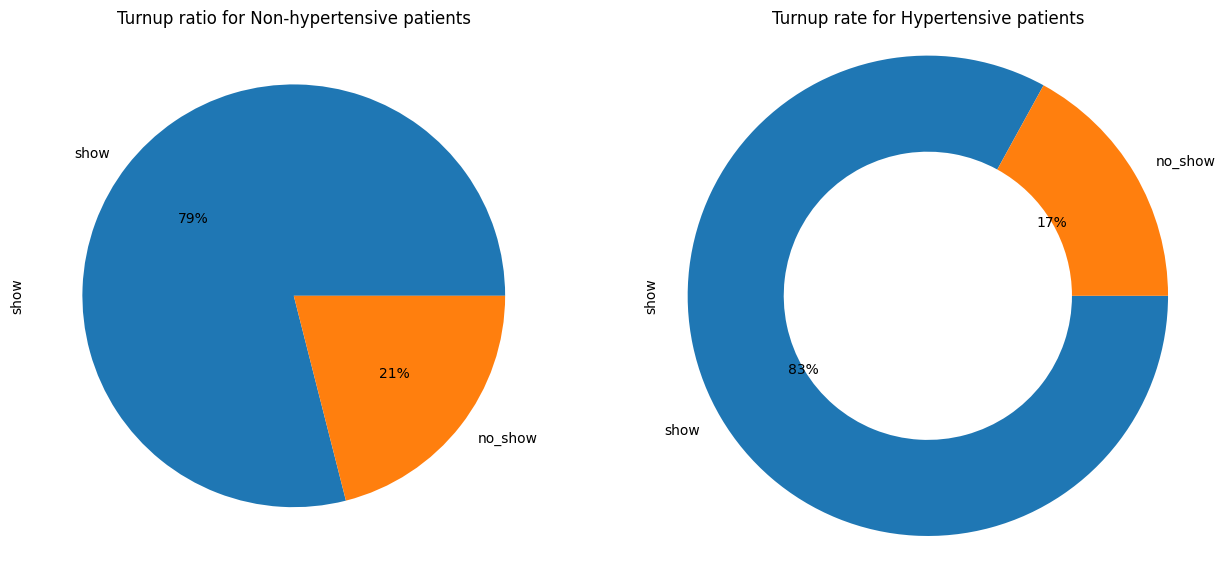

In [ ]:
fig,ax = plt.subplots(1,2,figsize = (15,7))

(df.query('hypertension == 0')['show'].value_counts(normalize = True)*100).plot(kind = 'pie',autopct = '%.0f%%',ax = ax[0], title = 'Turnup ratio for Non-hypertensive patients')


hyp_show_pct.plot(kind = 'pie',wedgeprops = {'width':0.4},ax =ax[1],autopct = '%.0f%%',counterclock = False,labels =hyp_show_pct.index, title = 'Turnup rate for Hypertensive patients')

plt.axis('square');


The attendance rate for hypertension and non-hypertensive patients differs by 4% when compared side by side, which is a sizable variation.

####We try to answer research question 2 for patients with Diabetes.

In [ ]:
dia = df.query('diabetes == 1')
dia.head(2)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,time_of_day,age_bracket
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,show,afternoon,41-60
36,F,2016-04-29 07:35:19+00:00,2016-04-29 00:00:00+00:00,63,SÃO CRISTÓVÃO,0,1,1,0,0,0,show,morning,61-80


Extracted into __dia__ are patients suffering from diabetes. 

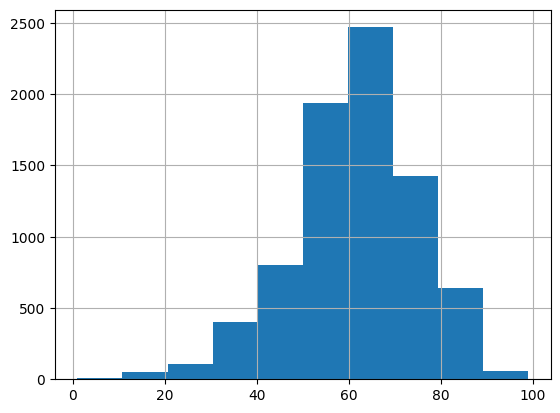

In [ ]:
dia.age.hist();

Apparently, most of the patients with diabetes are between 45 - 80.

In [ ]:
dia_pct =dia.show.value_counts(normalize = True)*100
dia_pct

show       82.0
no_show    18.0
Name: show, dtype: float64

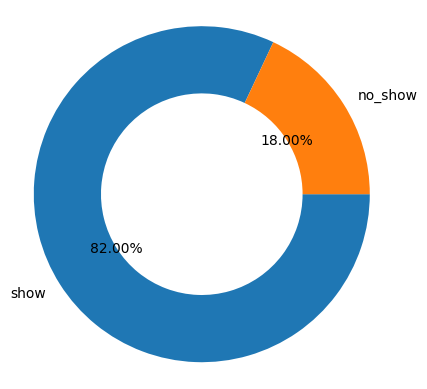

In [ ]:
plt.pie(dia_pct,wedgeprops = {'width':0.4},autopct = '%1.2f%%',counterclock = False,labels =dia_pct.index)
plt.axis('square'); 

Apparently, more than 80% of patients with diabetes show up for their appointment.

## hyp vs dia

In [ ]:
mix = hyp[['scheduledday','hypertension']].merge(dia[['gender','diabetes','show']],left_on = hyp.index, right_on = dia.index)               

__mix__ contains the patients with both diabetes and hypertension. 


In [ ]:
mix_pct = mix.show.value_counts(normalize = True)*100


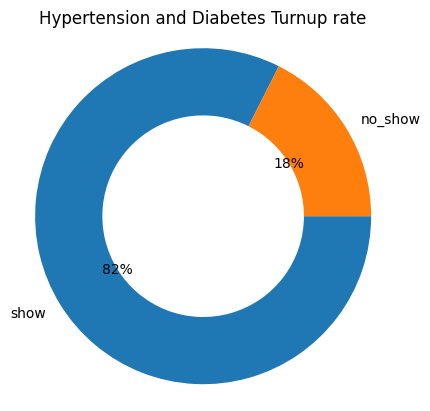

In [ ]:
plt.pie(mix_pct,wedgeprops = {'width':0.4},autopct = '%.f%%',counterclock = False,labels =mix_pct.index)
plt.axis('square')
plt.title('Hypertension and Diabetes Turnup rate'); 

More than 80% of patients suffering from both hypertension and diabetes showed up for their appointment. 

### Alcoholism 

In [ ]:
alc = df.query('alcoholism == 1')

Data on alcoholic patients have been extracted.

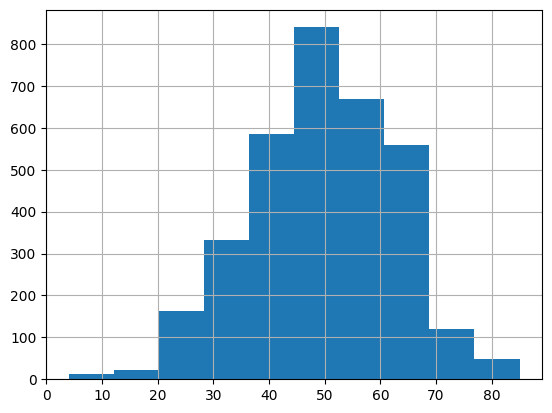

In [ ]:
alc.age.hist();

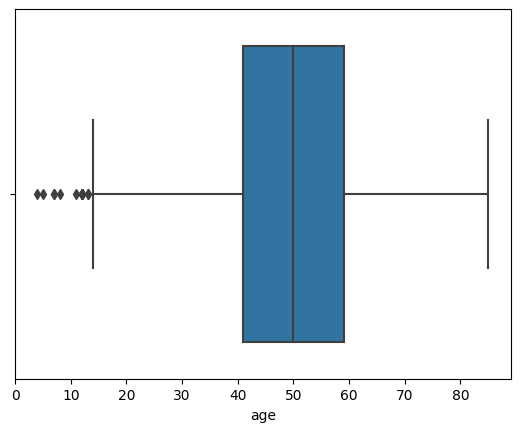

In [ ]:
sns.boxplot(x = 'age', data = alc);

There less than 10 year olds tagged as alcoholics , they are outliers in the dataset and I'll take them out.

In [ ]:
alc.age.describe()

count    3352.000000
mean       49.556384
std        12.697680
min         4.000000
25%        41.000000
50%        50.000000
75%        59.000000
max        85.000000
Name: age, dtype: float64

In [ ]:
#calculating the upper and lower bounds so as to eliminate outliers
#Q3 - Q1 = interquartile range
#upper bound = q3 + (1.5 * interquartile range)
#lower bound = q1 - (1.5 * interquartile range)
lower_bound = 41 - (1.5 * 18)
lower_bound

14.0

In [ ]:
alc = alc.query(f'age > {lower_bound}')

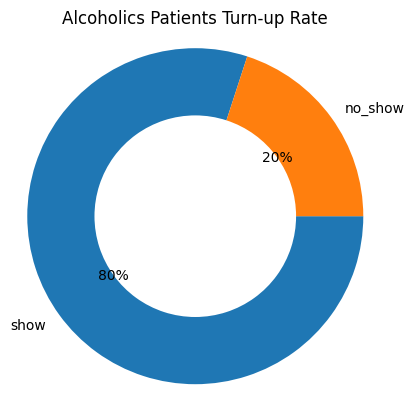

In [ ]:
alc_pct = alc.show.value_counts(normalize = True) * 100
plt.pie(alc_pct,wedgeprops = {'width':0.4},autopct = '%.f%%',counterclock = False,labels =alc_pct.index)
plt.axis('square')
plt.title('Alcoholics Patients Turn-up Rate');




Quite surprisingly, my initial intuition has been proved wrong as approximately 80% of patients that are alcoholics turned up for their appointment. 

In [ ]:
round(alc.gender.value_counts(normalize = True) * 100,)

M    63.0
F    37.0
Name: gender, dtype: float64

Apparently, 63 percent of Alcoholic patients are male. 


### Does the type of communication used to make an appointment (e.g. sms received) have an effect on no-show rates?

In [ ]:
sms = df.query('sms_received == 1')
sms.head(2)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,time_of_day,age_bracket
11,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,no_show,morning,21 - 40
15,F,2016-04-26 08:47:27+00:00,2016-04-29 00:00:00+00:00,15,NOVA PALESTINA,0,0,0,0,0,1,show,morning,under 20


Data on patients that got an sms, extracted.

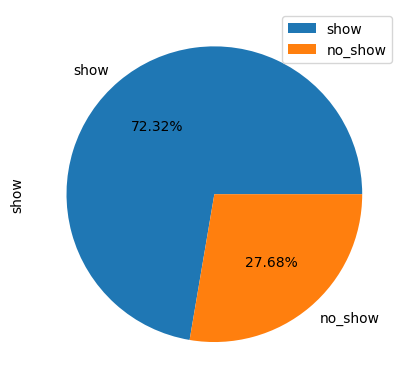

In [ ]:
(sms.show.value_counts(normalize= True) * 100).to_frame().plot(kind = 'pie',subplots = True,autopct = '%.2f%%');


The effect of an sms reminder is not massive as previous comparisms between the __show__ column and other variables have yielded a __"showed up" __ percentage higher than that of the __sms_received__ column and a __"no show"__ percentage lower than that of the __sms_received__ column. 

In [ ]:
sms.neighbourhood.value_counts()

JARDIM CAMBURI       2526
MARIA ORTIZ          2029
RESISTÊNCIA          1431
JARDIM DA PENHA      1416
ITARARÉ              1125
                     ... 
MORADA DE CAMBURI      40
PONTAL DE CAMBURI      24
ILHA DO BOI             7
ILHA DO FRADE           6
AEROPORTO               1
Name: neighbourhood, Length: 79, dtype: int64

### How does the time difference between the appointment day and scheduled day affect the decision to send an sms reminder?

In [ ]:
sms['time_diff'] = sms.appointmentday - sms.scheduledday

<ipython-input-89-8c1dbdd860d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sms['time_diff'] = sms.appointmentday - sms.scheduledday


Using the sliced dataset for all patients sent an sms reminder, I have created a __time_diff__ column to compute the difference between the appointment day and scheduled day. From this, I'll be able to extract the minimum amout of waiting for one to get an sms reminder.

In [ ]:
sms.time_diff.min()

Timedelta('2 days 08:01:12')

Apparently, only those whose waiting time is more than two days get sms reminders